In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("EtsySoldOrderItems2020-2021-2022.csv")

In [40]:
model_map = {"iPhone 12": 1, "iPhone 12 Pro": 2, "Samsung Galaxy S21": 3,"Galaxy Note 20":4,\
             "iPhone 11 Pro Max": 5,"iPhone 12 PRO MAX":6,"Watch Band":7,"iPhone Mini 12":8,\
            "Galaxy Note 20 ULTRA":9,"Galaxy S20 Ultra":10,"iPhone 13 Series":11,
            "Galaxy Note 10 Plus":12,"iPhone 13 Pro":13,"Dog":14,"AirPods":14,"Desk Mat":15,
            "Galaxy S20 Plus":16,"iPhone SE":17,"Samsung Galaxy S20":18,"Apple iPhone XS MAX":19,
            "Apple iPhone XR":20,"Apple iPhone X/XS":21,"iPhone 11":22,"Samsung S10":23,
            "Card Holder":24,"Galaxy N10":25,"iPhone 7/8":26,"Women's Wallet":27,
            "Custom order":28,"Organizer":29,"iPhone 14 Series":30,"Galaxy S22 Series":31,"AirTag":32,
            "Mouse Pad":33,"Galaxy S22":34,"Makeup Purse":35,"Huawei Mate 20 Pro":36,
             "Samsung Galaxy S10":37,"Huawei Mate 20 Lite":38,"Samsung Galaxy S8 Plus":39,
             "Samsung Galaxy S10 Plus":40,"Samsung Note 8":41,"Huawei P20 Pro":42,"Samsung Note 10":43,
            "Samsung Galaxy S8":44,"Galaxy S9 Plus":45,"Galaxy Note 9":46,"Galaxy S9":47,
            "iPhone XS MAX":48,"Samsung Note 9":46,"iPhone X/iPhone XS":49,"iPhone X / iPhone XS":49\
             ,"iPhone X/XS":49,"iPhone 7 / 8":26,"Galaxy Note 10+":51,"iPhone X":52} 

In [41]:
reversed_dict = {value: key for key, value in model_map.items()}

In [42]:
def map_model(item_name):
    x = False
    for model, number in reversed_dict.items():
        if model==item_name:
            x= True
            return number
    if x == False:
        print(item_name)
df["Item Model"] = df["Item Model"].apply(map_model)

In [43]:
df

,Item Model,Quantity,Price,Coupon Code,Ship Country,Season,Month,Year,Color
0,Galaxy Note 20,1,44.67,1,1,0,12,2020,2.0
1,iPhone 12,1,52.00,1,1,0,12,2020,1.0
2,iPhone 11 Pro Max,1,55.33,1,1,0,12,2020,1.0
3,iPhone 12,1,62.00,1,1,0,12,2020,1.0
4,Watch Band,1,53.00,1,1,0,12,2020,0.0
...,...,...,...,...,...,...,...,...,...
2222,Galaxy Note 10 Plus,1,64.33,1,1,0,1,2022,9.0
2223,Card Holder,1,110.66,1,1,0,1,2022,0.0
2224,Galaxy Note 10 Plus,1,64.33,1,1,0,1,2022,9.0
2225,Watch Band,1,72.26,1,1,0,1,2022,-1.0


In [44]:
seasons_dict = {0:'Winter', 1: 'Spring', 2:'Summer',3: 'Fall'}
df["Season"] = df["Season"].map(seasons_dict)

In [45]:
df.columns

Index(['Item Model', 'Quantity', 'Price', 'Coupon Code', 'Ship Country',
       'Season', 'Month', 'Year', 'Color'],
      dtype='object')

In [46]:
x = pd.DataFrame(df.groupby(["Year"]).sum())

Total Quantities by year

In [47]:
x.head()

,Quantity,Price,Coupon Code,Ship Country,Month,Color
Year,,,,,,
2020,685,41074.72,681,2111,5298,1991.0
2021,961,68192.77,960,2339,6774,2287.0
2022,589,48889.54,586,1676,3423,718.0


In [48]:
x.reset_index(inplace=True)

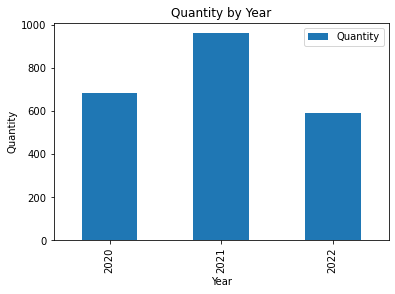

In [49]:
x.plot(x='Year', y='Quantity', kind='bar',)
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Quantity by Year')
plt.show()

In [50]:
category_dist = df.groupby("Item Model").sum()

In [83]:
category_dist.sort_values(by="Quantity")

,Quantity,Price,Coupon Code,Ship Country,Month,Year,Color
Item Model,,,,,,,
Mouse Pad,1,64.00,1,1,12,2022,0.0
iPhone X,1,45.90,1,1,1,2020,10.0
Huawei Mate 20 Pro,1,48.90,1,3,11,2020,1.0
Huawei Mate 20 Lite,1,48.90,1,30,11,2020,2.0
Galaxy S22,1,64.00,1,1,4,2022,1.0
iPhone XS MAX,1,76.40,1,1,5,2020,10.0
Custom order,2,129.50,2,2,17,4042,0.0
AirTag,2,96.00,2,4,17,4044,0.0
Makeup Purse,2,178.00,2,2,24,4044,0.0


In [52]:
watch_band = df[df["Item Model"] == "Watch Band"]

In [75]:
watch_band

,Item Model,Quantity,Price,Coupon Code,Ship Country,Season,Month,Year,Color
4,Watch Band,1,53.00,1,United States,Winter,12,2020,Genuine Leather
53,Watch Band,1,53.00,1,United States,Winter,12,2020,Yellow
84,Watch Band,1,53.00,1,United States,Winter,12,2020,Beige
249,Watch Band,1,50.00,1,Germany,Fall,10,2020,Red
260,Watch Band,1,57.50,1,United States,Fall,10,2020,Yellow
...,...,...,...,...,...,...,...,...,...
2199,Watch Band,1,68.26,1,Canada,Winter,1,2022,Leather
2206,Watch Band,1,68.26,1,United States,Winter,1,2022,Leather
2210,Watch Band,1,72.26,1,United States,Winter,1,2022,Leather
2212,Watch Band,1,68.26,1,United States,Winter,1,2022,Leather


In [80]:
watch_band[watch_band["Month"] == 12].describe()

,Quantity,Price,Coupon Code,Month,Year
count,36.0,36.000000,36.0,36.0,36.000000
mean,1.0,62.234444,1.0,12.0,2021.027778
std,0.0,5.985939,0.0,0.0,0.446325
min,1.0,51.030000,1.0,12.0,2020.000000
25%,1.0,58.905000,1.0,12.0,2021.000000
50%,1.0,63.030000,1.0,12.0,2021.000000
75%,1.0,68.260000,1.0,12.0,2021.000000
max,1.0,72.260000,1.0,12.0,2022.000000


In [81]:
watch_band[watch_band["Month"] == 11].describe()

,Quantity,Price,Coupon Code,Month,Year
count,21.0,21.000000,21.0,21.0,21.000000
mean,1.0,65.102857,1.0,11.0,2021.142857
std,0.0,4.611564,0.0,0.0,0.358569
min,1.0,56.030000,1.0,11.0,2021.000000
25%,1.0,60.030000,1.0,11.0,2021.000000
50%,1.0,68.760000,1.0,11.0,2021.000000
75%,1.0,68.760000,1.0,11.0,2021.000000
max,1.0,71.260000,1.0,11.0,2022.000000


Year based distribution

In [53]:
year_based = watch_band[["Year","Quantity"]]
year_based = pd.DataFrame(year_based.groupby("Year").sum())

Number of watch band orders based on year

In [54]:
year_based

,Quantity
Year,
2020,34
2021,227
2022,106


In [55]:
year_based.reset_index(inplace= True)

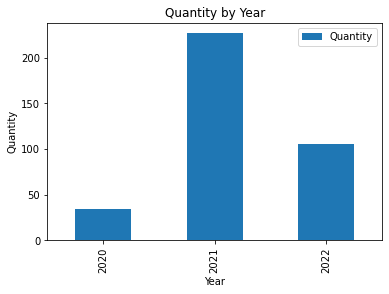

In [56]:
year_based.plot(x='Year', y='Quantity', kind='bar',)
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Quantity by Year')
plt.show()

Seasons based distribution

In [57]:
grouped = watch_band.groupby(['Year', 'Season'])
seasonly_quantities = pd.DataFrame(grouped['Quantity'].sum())

In [58]:
print(seasonly_quantities)

             Quantity
Year Season          
2020 Fall           9
     Spring        10
     Summer         6
     Winter         9
2021 Fall          91
     Spring        24
     Summer        78
     Winter        34
2022 Fall          17
     Spring        22
     Summer        41
     Winter        26


In [59]:
seasonly_quantities.reset_index(inplace= True)

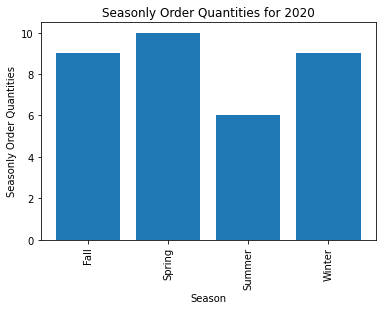

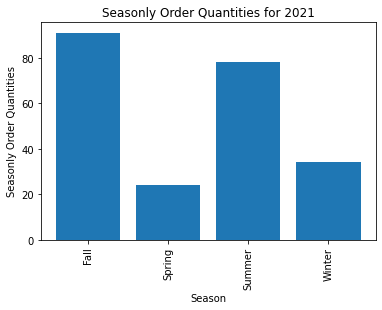

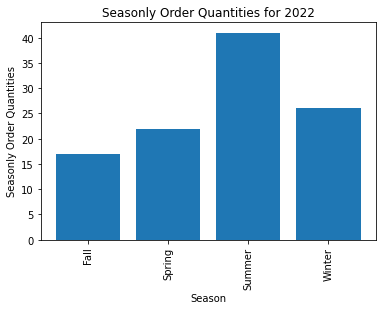

In [60]:
for year in seasonly_quantities['Year'].unique():
    plt.figure(figsize=(6, 4))
    plt.bar(seasonly_quantities.loc[seasonly_quantities['Year'] == year, 'Season'],
             seasonly_quantities.loc[seasonly_quantities['Year'] == year, 'Quantity'])
    plt.xlabel('Season')
    plt.ylabel('Seasonly Order Quantities')
    plt.title(f'Seasonly Order Quantities for {year}')
    plt.xticks([0,1,2,3], rotation=90)
    plt.show()
# "Winter","Spring","Summer","Fall"

Country based distribution

In [61]:
country_map = {'United States':1, 'Canada':2, 'United Kingdom':3, 'Australia':4,
       'Switzerland':5, 'Sweden':6, 'Israel':7, 'Italy':8, 'Ireland':9,
       'New Zealand':10, 'United Arab Emirates':11, 'Hong Kong':12, 'Malaysia':13,
       'The Netherlands':14, 'Taiwan':15, 'Germany':16, 'Philippines':17,"Austria":18,
              "South Korea":19,"France":20,"Hungary":21,"Singapore":22,"Finland":23,
              "Belgium":24,"Luxembourg":25,"Puerto Rico":26,"Sri Lanka":27,"South Africa":28,
              "Latvia":29,"Greece":30,"Reunion":31,"Denmark":32,"Norway":33,"Estonia":34,
              "Spain":35,"Brazil":36,"India":37,"Japan":38,"Indonesia":39,"Mexico":40,
              "Russia":41}

In [62]:
reversed_dict = {value: key for key, value in country_map.items()}

In [63]:
def map_country(country):
    x = False
    for i, number in reversed_dict.items():
        if i == country:
            x= True
            return number
    if x == False:
        print(country)
watch_band["Ship Country"] = watch_band["Ship Country"].apply(map_country)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9372\2588652522.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watch_band["Ship Country"] = watch_band["Ship Country"].apply(map_country)


In [64]:
country_quantities = watch_band.groupby('Ship Country')['Quantity'].sum()

In [65]:
country_quantities

Ship Country
Australia            2
Austria              1
Canada              28
Denmark              1
Finland              1
France               3
Germany             22
Hong Kong            1
Ireland              3
Italy                2
Luxembourg           1
South Africa         1
Sweden               3
Switzerland          1
The Netherlands      1
United Kingdom       6
United States      290
Name: Quantity, dtype: int64

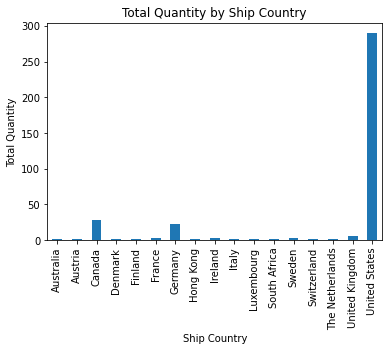

In [66]:
country_quantities.plot(kind='bar',)
plt.xlabel('Ship Country')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Ship Country')
plt.show()

Color based distribution

In [67]:
color_map = {"Brown":1,"Gray":2,"Black":3,"Navy Blue":4,"Blue":5,"Yellow":6,"Red":7,"Pink":8,
            "Multicolered":9,"Green":10,"Beige":11,"Purple":12,"Leopar":13,"Multicolored":9,
            "Grey":2,"Multicolor":9,"Rose Gold":14,"Rainbow":15,"White":16,"Genuine Leather":0,\
            "Leather":-1}

In [68]:
reversed_dict = {value: key for key, value in color_map.items()}

In [69]:
def map_color(item):
    x = False
    for color, number in reversed_dict.items():
        if color == item:
            x= True
            return number
    if x == False:
        return 
watch_band["Color"] = watch_band["Color"].apply(map_color)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9372\2448195412.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watch_band["Color"] = watch_band["Color"].apply(map_color)


In [70]:
color_dist = watch_band.groupby('Color')['Quantity'].sum()

In [71]:
color_dist

Color
Beige               57
Black               14
Brown               39
Genuine Leather     21
Green                7
Grey                23
Leather            165
Navy Blue            2
Pink                 4
Purple               1
Rainbow              4
Red                  4
Rose Gold            7
White               16
Yellow               3
Name: Quantity, dtype: int64

In [72]:
color_dist_season = watch_band.groupby(['Season', 'Color'])['Quantity'].sum().reset_index()

In [73]:
grouped = watch_band.groupby('Season')['Color'].value_counts()
print(grouped)

Season  Color          
Fall    Leather            50
        Beige              26
        Brown              11
        Grey                8
        Black               4
        Genuine Leather     4
        Rose Gold           3
        White               3
        Rainbow             2
        Red                 2
        Green               1
        Navy Blue           1
        Yellow              1
Spring  Leather            21
        Brown               9
        Beige               6
        Black               4
        Green               4
        Genuine Leather     3
        White               3
        Grey                2
        Rose Gold           2
        Rainbow             1
Summer  Leather            58
        Beige              24
        Brown              11
        White              10
        Grey                9
        Genuine Leather     5
        Black               3
        Green               1
        Navy Blue           1
        Pink    

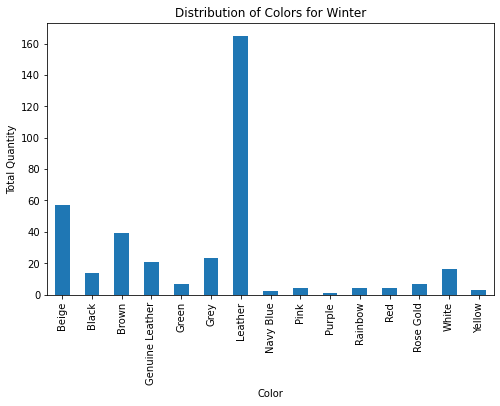

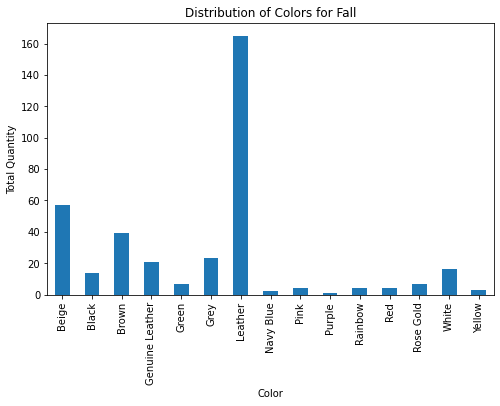

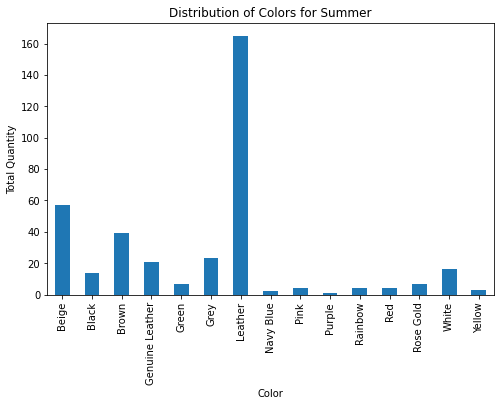

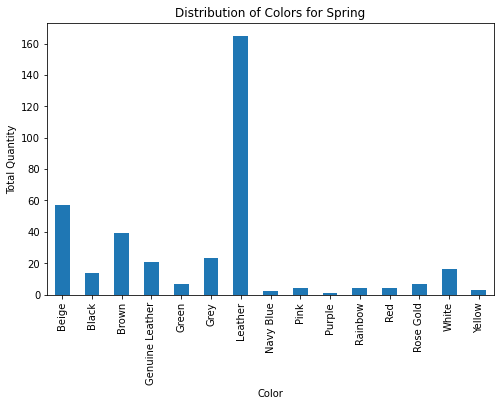

In [74]:
seasons = watch_band['Season'].unique()
for season in seasons:
    data = watch_band[watch_band['Season'] == season]
    grouped = watch_band.groupby('Color')['Quantity'].sum()
    plt.figure(figsize=(8, 5))
    grouped.plot(kind='bar')
    plt.xlabel('Color')
    plt.ylabel('Total Quantity')
    plt.title(f'Distribution of Colors for {season}')
    plt.show()